In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

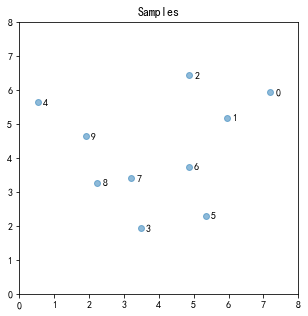

In [2]:
np.random.seed(43134)
x = np.random.rand(10, 2) * 5  + 1.5
x[0] += np.array([1, 0.5])
x[4] += np.array([-1, 1])

plt.figure(figsize=(5, 5))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1-0.1))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

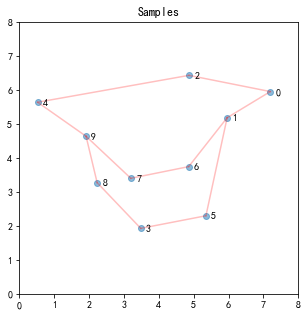

In [3]:
# 创建路线
graph = dict()
graph[0] = [1,2]
graph[1] = [6,5]
graph[6] = [7]
graph[7] = [9]
graph[9] = [4]
graph[5] = [3]
graph[3] = [8]
graph[8] = [9]
graph[2] = [4]

# 地图线
plt.figure(figsize=(5, 5))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)

for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.25)

for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1-0.1))

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

In [4]:
# 构建距离矩阵
n = len(x)
dis_map = np.zeros((n, n)) + np.inf
for i in range(n):
    dis_map[i][i] = 0

lnk_map = [[False for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        lnk_map[i][j] = [i, j]
            

# 按照节点赋值
for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        dis = np.sqrt(np.power(x1-x2, 2) + np.power(y1-y2, 2))
        dis_map[k, v] = dis_map[v][k] = dis


In [5]:
'''
# Floyd 算法求解最短路径
# https://blog.csdn.net/ytuyzh/article/details/88617987
'''
# Floyd 算法 ======================================================================================
def floyd(dis_map, lnk_map):
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if(dis_map[i][k]+dis_map[k][j]<dis_map[i][j]): # 采用【动态规划】的思想，以k为中介点，判断是否比直接距离要短
                    dis_map[i][j] = dis_map[i][k]+dis_map[k][j] # 采用k作为中介点的新路径距离
                    lnk_map[i][j] = lnk_map[i][k]+lnk_map[k][j][1:] # 新的路径
    return
floyd(dis_map, lnk_map)

In [6]:
lnk_df = pd.DataFrame(lnk_map)
dis_df = pd.DataFrame(dis_map)
map_df = lnk_df.copy()
for i in range(n):
    for j in range(n):
        lnk = '->'.join([str(i) for i in lnk_df.iloc[i, j]])
        map_df.iloc[i, j] = 'lnk=' + lnk + f", dis={dis_df.iloc[i, j].round(2)}"

In [7]:
lnk_df

,0,1,2,3,4,5,6,7,8,9
0,"[0, 0]","[0, 1]","[0, 2]","[0, 1, 5, 3]","[0, 2, 4]","[0, 1, 5]","[0, 1, 6]","[0, 1, 6, 7]","[0, 1, 6, 7, 9, 8]","[0, 1, 6, 7, 9]"
1,"[1, 0]","[1, 1]","[1, 0, 2]","[1, 5, 3]","[1, 6, 7, 9, 4]","[1, 5]","[1, 6]","[1, 6, 7]","[1, 6, 7, 9, 8]","[1, 6, 7, 9]"
2,"[2, 0]","[2, 0, 1]","[2, 2]","[2, 0, 1, 5, 3]","[2, 4]","[2, 0, 1, 5]","[2, 0, 1, 6]","[2, 0, 1, 6, 7]","[2, 4, 9, 8]","[2, 4, 9]"
3,"[3, 5, 1, 0]","[3, 5, 1]","[3, 5, 1, 0, 2]","[3, 3]","[3, 8, 9, 4]","[3, 5]","[3, 5, 1, 6]","[3, 8, 9, 7]","[3, 8]","[3, 8, 9]"
4,"[4, 2, 0]","[4, 9, 7, 6, 1]","[4, 2]","[4, 9, 8, 3]","[4, 4]","[4, 9, 8, 3, 5]","[4, 9, 7, 6]","[4, 9, 7]","[4, 9, 8]","[4, 9]"
5,"[5, 1, 0]","[5, 1]","[5, 1, 0, 2]","[5, 3]","[5, 3, 8, 9, 4]","[5, 5]","[5, 1, 6]","[5, 1, 6, 7]","[5, 3, 8]","[5, 3, 8, 9]"
6,"[6, 1, 0]","[6, 1]","[6, 1, 0, 2]","[6, 1, 5, 3]","[6, 7, 9, 4]","[6, 1, 5]","[6, 6]","[6, 7]","[6, 7, 9, 8]","[6, 7, 9]"
7,"[7, 6, 1, 0]","[7, 6, 1]","[7, 6, 1, 0, 2]","[7, 9, 8, 3]","[7, 9, 4]","[7, 6, 1, 5]","[7, 6]","[7, 7]","[7, 9, 8]","[7, 9]"
8,"[8, 9, 7, 6, 1, 0]","[8, 9, 7, 6, 1]","[8, 9, 4, 2]","[8, 3]","[8, 9, 4]","[8, 3, 5]","[8, 9, 7, 6]","[8, 9, 7]","[8, 8]","[8, 9]"
9,"[9, 7, 6, 1, 0]","[9, 7, 6, 1]","[9, 4, 2]","[9, 8, 3]","[9, 4]","[9, 8, 3, 5]","[9, 7, 6]","[9, 7]","[9, 8]","[9, 9]"


In [8]:
dis_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.457118,2.379675,6.311015,6.791711,4.406218,3.270471,4.964304,8.148873,6.747489
1,1.457118,0.000000,3.836793,4.853897,7.002925,2.949100,1.813354,3.507186,6.691755,5.290371
2,2.379675,3.836793,0.000000,8.690690,4.412036,6.785893,5.650146,7.343978,7.525974,6.124590
3,6.311015,4.853897,8.690690,0.000000,4.952050,1.904797,6.667250,5.022682,1.838112,3.239497
4,6.791711,7.002925,4.412036,4.952050,0.000000,6.856847,5.189571,3.495739,3.113938,1.712554
5,4.406218,2.949100,6.785893,1.904797,6.856847,0.000000,4.762454,6.456286,3.742909,5.144294
6,3.270471,1.813354,5.650146,6.667250,5.189571,4.762454,0.000000,1.693832,4.878402,3.477017
7,4.964304,3.507186,7.343978,5.022682,3.495739,6.456286,1.693832,0.000000,3.184570,1.783185
8,8.148873,6.691755,7.525974,1.838112,3.113938,3.742909,4.878402,3.184570,0.000000,1.401385
9,6.747489,5.290371,6.124590,3.239497,1.712554,5.144294,3.477017,1.783185,1.401385,0.000000
